# Project: Mapping the State-Space of Stem Cell "Decisions"

### 1. Background : Stem Cell Differentiation
In biology, every cell in your body contains the same "source code" (DNA). However, a heart cell behaves differently from a neuron because they are "executing" different parts of that code. However, in order to reach their fates ('final' cell type), cells undergo a journey, the so called **cell differenciation** or **cell specification**. 

Biologists often use the **Waddington Landscape** analogy: imagine a ball rolling down a hilly terrain. At the top (0h), the ball can go down many different valleys. By the bottom (168h), the ball is stuck in one specific path.

![alt text](waddington2.png)


### 2. Data

We quantify this execution by measuring the levels of **Gene Expression** throughout development.

In the current project, the data follows **Mouse Embryonic Stem Cells (ESCs)** over a period of 7 days (168 hours). 
At $T=0$, the cells are "Pluripotent"—think of them as uninitialized objects that have the potential to become almost any tissue type. As time progresses, they interprete gene expression levels as signals to **differentiate**. At the end of the experiement, we get two cell types: **E14** and **R1**.

The **Single-Cell Gene Expression** dataset at our disposal is the following. 
*   **Dimensions:** Each cell is a data object described by **96 features** (different marker genes, in addition to time and type of cell).

| Feature | Type | Description |
| :--- | :--- | :--- |
| **Time** | `int` | The timestamp of the snapshot (0h, 24h, 48h, 72h, 96h, 120h, 168h). |
| **Type** | `string` | The cell line background (**E14** or **R1**). These are two different "classes" of stem cells. |
| **Genes** | `float` | **96 columns** (e.g., *Actb, Nanog, Sox2...*). These represent the normalized expression level of specific genes. |


*** 
*Data Source & Paper: Patrick S. Stumpf, "Stem Cell Differentiation as a Non-Markov Stochastic Process," Cell Systems, 2017.*

### Part 1. Load the dataset
Read the "gene_expression_data.csv" dataset into a pandas dataframe. 

Once loaded, you can use the "head()", "info()" or "describe()" functions for an overview of the dataset and its summary statistics. Below is an example result of head() applied to the dataset.

![alt text](head.png)

Tip: Because the dataset, although high-dimensional, only has 96 columns, you can also open the dataset using Excel and view it in tabular form by using the the "text-to-columns" feature of MS Excel (https://www.youtube.com/watch?v=QyZ6IMkln2U).

In [1]:
########## Part 1. Write your code in this cell ############
import pandas as pd
import seaborn as sns
import matplotlib as plt;

df = pd.read_csv("gene_expression_data.csv")
df.head()

,Sample,Time,Type,Actb,Bmi1,Bmp4,Bmp7,Bmpr1a,Cd34,Cdh1,...,Trp53,Tubb3,Utf1,Vim,Wdr5,Wnt3a,Wnt5a,Zfp281,Zfp42,Unnamed: 99
0,E14tg2a.0h.1A,0,E14,16.716759,0.00000,26.183448,0.0,25.493528,0.0,25.754394,...,22.225853,25.431561,22.266882,21.747678,22.577380,0.000000,0.0,22.336935,18.880554,NaN
1,E14tg2a.0h.1B,0,E14,11.283763,0.00000,15.379562,0.0,18.535507,0.0,0.000000,...,13.895273,13.837472,16.676966,12.199917,13.884512,18.460856,0.0,13.841466,12.469256,NaN
2,E14tg2a.0h.1C,0,E14,11.356264,0.00000,15.305810,0.0,0.000000,0.0,0.000000,...,14.426960,15.933678,19.744670,11.956928,14.371542,0.000000,0.0,13.996737,10.913159,NaN
3,E14tg2a.0h.1D,0,E14,10.923010,18.05053,16.744032,0.0,17.100323,0.0,0.000000,...,14.508559,13.673305,16.911726,11.703409,14.501776,0.000000,0.0,14.106204,11.555227,NaN
4,E14tg2a.0h.1E,0,E14,10.334779,18.60766,16.693236,0.0,17.364452,0.0,0.000000,...,13.763772,12.942459,16.411662,11.049555,14.158724,0.000000,0.0,13.441827,11.914481,NaN


### Part 2. Visualize some data
Because the dataset is high-dimensional (cells are described across 96 genes), we canNOT visualize all genes. In this part, we will restrict our focus on two genes: "Bmp4" and "Nanog".

Create a figure with two plots (one for each gene), where each plot shows, at each time (0H, 24H, ..., 168H), the statistics of expresssion levels of the genes in cells. What plot types are appropriate for this ?
Hint: you may want to have time on the x-asis  

Bonus: There are two types of cells in the dataset (E14 and R1). Can you enhance the plot to visualize the expression levels within each cell type ? What do you observe ?

C:\Users\svanr\AppData\Local\Temp\ipykernel_21064\143335965.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.boxplot(data = df, x = "Time",y = "Nanog",hue = "Type",ax = ax[1],color = "red")


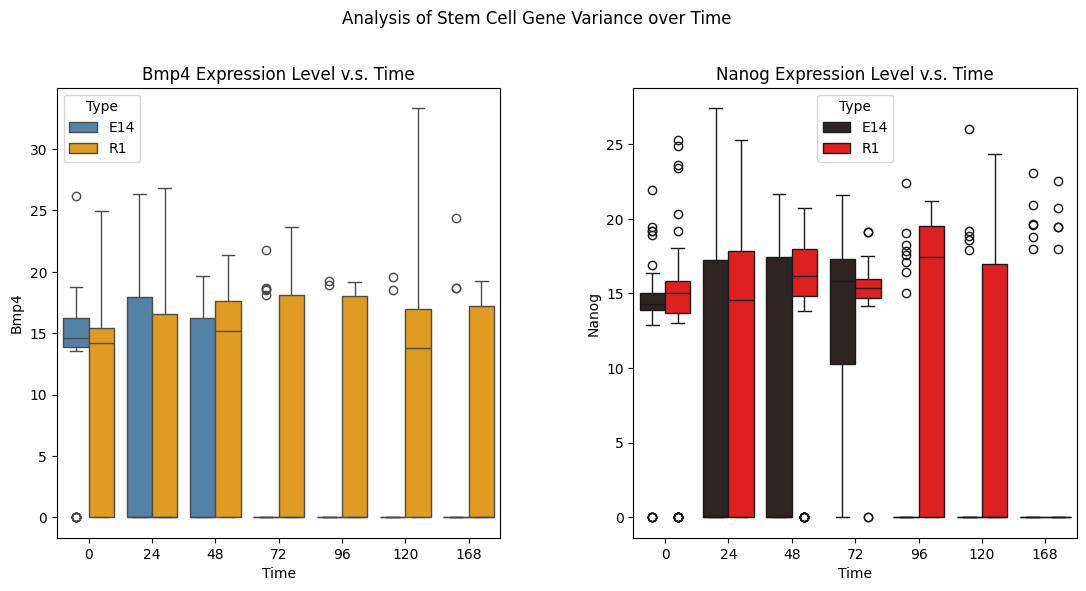

'\nObservations:\n-Nanog contains higher expressions at earlier points in time, with a sharp decline toward 72-96H\n-Bmp4 persists across all time points, with no clean increase or decrease.\n-R1 shows a general broader distribution pattern as compared to E14\n'

In [2]:
########## Part 2. Write your code in this cell ###########
fig,ax = plt.pyplot.subplots(1,2, figsize = (12,6))
plt.pyplot.subplots_adjust(
    left=0.1,
    right=0.95,
    top=0.85,
    bottom=0.1,
    wspace=0.3 
)

palette = {
    "E14": "steelblue",
    "R1": "orange",
}

sns.boxplot(data = df, x = "Time",y = "Bmp4",hue = "Type",ax = ax[0],palette = palette)
sns.boxplot(data = df, x = "Time",y = "Nanog",hue = "Type",ax = ax[1],color = "red")

ax[0].set_title("Bmp4 Expression Level v.s. Time")
ax[1].set_title("Nanog Expression Level v.s. Time")
fig.suptitle("Analysis of Stem Cell Gene Variance over Time")
plt.pyplot.show()


'''
Observations:
-Nanog contains higher expressions at earlier points in time, with a sharp decline toward 72-96H
-Bmp4 persists across all time points, with no clean increase or decrease.
-R1 shows a general broader distribution pattern as compared to E14
'''

### Part 3. Relationships between genes
Because the dataset is high-dimensional (cells are described across 96 genes), we canNOT visualize all relationships between our variables (genes). However, as in almost every real-world datasets, variables entertain strong or weak relations. In this part, we will try to identity which genes that have strong ties, and attempt to visualize how the behave together.

Once more, because the dataset is multi-dimensional, we will restrict our analysis to the subset of genes (although we can get away with an analysis of the whole set of genes in our current scenario of 96 genes) 

    genes = ['Nanog', 'Pou5f1', 'Sox2', 'Gata6', 'Pax6', 'Sox1', 'Actb', 'Bmp4'].

Create a figure with the following plots:

1. A **correlation heatmap** showing the correlations of all genes above at time O
2. A **correlation heatmap** showing the correlations of all genes above at time 168
3. From the first plot, pick the two genes with the highest correlation and create a **scatter plot** of both. Does the scatter trend verify the observed correlation ? Compare their correlation at time 168. What do you observe ?
4. From the second plot, pick the two genes with the highest correlation and create a **scatter plot** of both. Does the scatter trend verify the observed correlation ? Compare their correlation at time 0. What do you observe ?

Bonus: i.Think about improvements you could make on the scatter plots. What comes to mind ? Create a figure with two plots (Hint: different colors and/or markers for the two different cell types, etc.)
ii. How does the relationship of the 2 genes picked at (3.) evolve through all time points (0,24,48,72,69,120,144,168) ? What plot(s) can you use for this ? 

Correlation factor between Sox2 & Bmp4 (T=0): 0.61
Correlation factor between Sox2 & Pax6 (T=168): 0.59


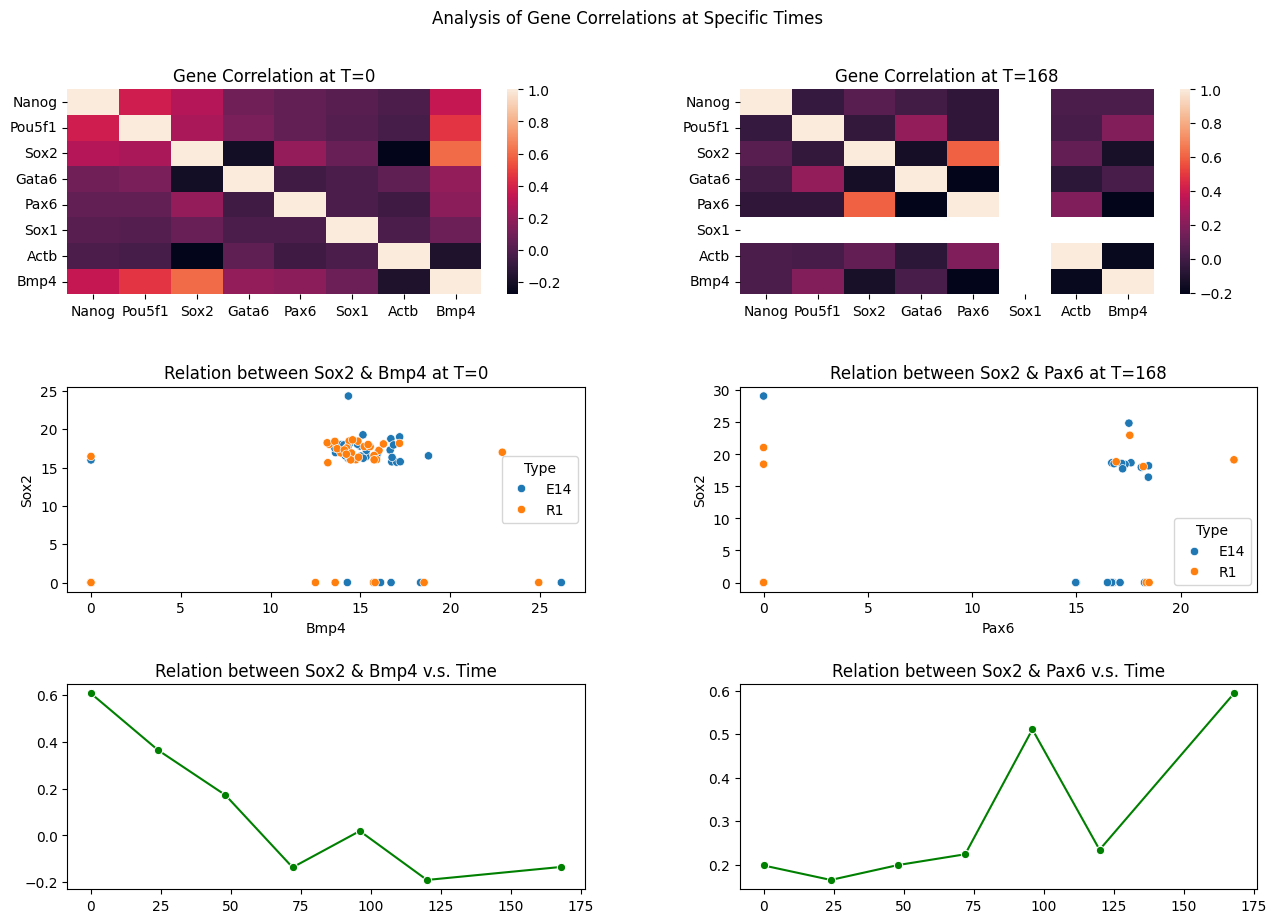

'\nObservations:\n- Sox2 has high correlation with Bmp4 and 0H, but develops a stronger correlation with Pax6 at 168H.\n- Sox2 & Bmp4 display a moderate positive trend, with scattered outliers. E14 & R1 cells have strong overlaps.\n- Sox2 & Pax6 also display a moderate positive trend with outliers, and a strong overlap between E14 & R1 cells.\n'

In [3]:
########## Part 3. Write your code in this cell ############
genes = ['Nanog','Pou5f1','Sox2','Gata6','Pax6','Sox1','Actb','Bmp4']

fig,ax = plt.pyplot.subplots(3,2, figsize = (14,10))
plt.pyplot.subplots_adjust(
    left=0.1,
    right=0.95,
    top=0.9,
    bottom=0.1,
    hspace = 0.45,
    wspace=0.3 
)

df_t1 = df.loc[df["Time"] == 0,genes]
df_t2 = df.loc[df["Time"] == 168,genes]
df_t1 = df_t1.apply(pd.to_numeric,errors = 'coerce')
df_t2 = df_t2.apply(pd.to_numeric,errors = 'coerce')

corr_1 = df_t1.corr()
corr_2 = df_t2.corr()

print(f"Correlation factor between Sox2 & Bmp4 (T=0): {round(df_t1["Bmp4"].corr(df_t1["Sox2"]),2)}")
print(f"Correlation factor between Sox2 & Pax6 (T=168): {round(df_t2["Pax6"].corr(df_t2["Sox2"]),2)}")

sns.heatmap(corr_1,ax = ax[0,0])
sns.heatmap(corr_2,ax = ax[0,1])
sns.scatterplot(data = df_t1, x = "Bmp4",y = "Sox2",hue = df["Type"],ax = ax[1,0])
sns.scatterplot(data = df_t2, x = "Pax6",y = "Sox2",hue = df["Type"],ax = ax[1,1])


times = sorted(df["Time"].unique())
correlations_t1 = []
correlations_t2 = []

for t in times:
    sub = df[df["Time"] == t]
    correlations_t1.append(sub["Sox2"].corr(sub["Bmp4"]))
    correlations_t2.append(sub["Sox2"].corr(sub["Pax6"]))
sns.lineplot(x =times,y =correlations_t1,marker = 'o',color = "green",ax = ax[2,0])
sns.lineplot(x =times,y =correlations_t2,marker = 'o',color = "green",ax = ax[2,1])

ax[0,0].set_title("Gene Correlation at T=0")
ax[0,1].set_title("Gene Correlation at T=168")
ax[1,0].set_title("Relation between Sox2 & Bmp4 at T=0")
ax[1,1].set_title("Relation between Sox2 & Pax6 at T=168")
ax[2,0].set_title("Relation between Sox2 & Bmp4 v.s. Time")
ax[2,1].set_title("Relation between Sox2 & Pax6 v.s. Time")
fig.suptitle("Analysis of Gene Correlations at Specific Times")
plt.pyplot.show()


'''
Observations:
- Sox2 has high correlation with Bmp4 and 0H, but develops a stronger correlation with Pax6 at 168H.
- Sox2 & Bmp4 display a moderate positive trend, with scattered outliers. E14 & R1 cells have strong overlaps.
- Sox2 & Pax6 also display a moderate positive trend with outliers, and a strong overlap between E14 & R1 cells.
'''


### Part 4. Dimensionality Reduction (PCA)
We can only do so much in trying to visualize our dataset one variable at the time, or 2 variables at the time. Our dataset is high-dimensional, we must therefore use appropriate methods to visualize it. Most notably, dimensionality reduction methods.

1. Perform **Principal Component Analysis (PCA)** on the data, keeping only 2 dimensions
(Hint: you don't need to pass columns 'Time' and 'Type' to PCA as they do not contain information on genes. Extract just genes columns and pass it to PCA. The line below shows how you can 'drop' those columns)

    X = df.drop(['Time', 'Type'], axis=1)

2. Determine the 'importance' of each of your principal component ? How do you inteprete that ?

3. Create a scatter plot on the resulting two dimensional data (PC1 vs PC2). What do you observe ? Can you identified different trajectories in time for different cell types (E14, R1) ?

4. Enhance the scatter plot using different marker types for cell type (E14, R1) and different colors for time (0, 24, ..., 268). What do you observe ?

Bonus: Perform **Principal Component Analysis (PCA)** on the data, this time keeping 3 dimensions. Redo steps 1-4

Explained Variance Ratio: [0.21367199 0.08065004]
Total Variance Explained: 29.43%


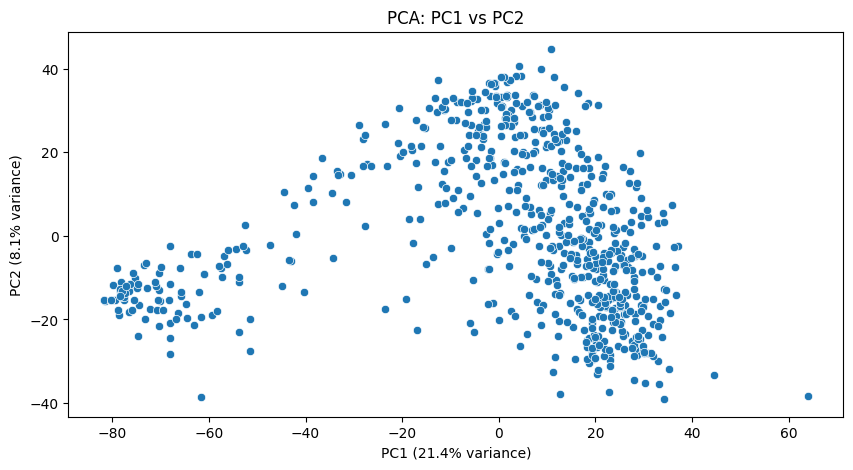

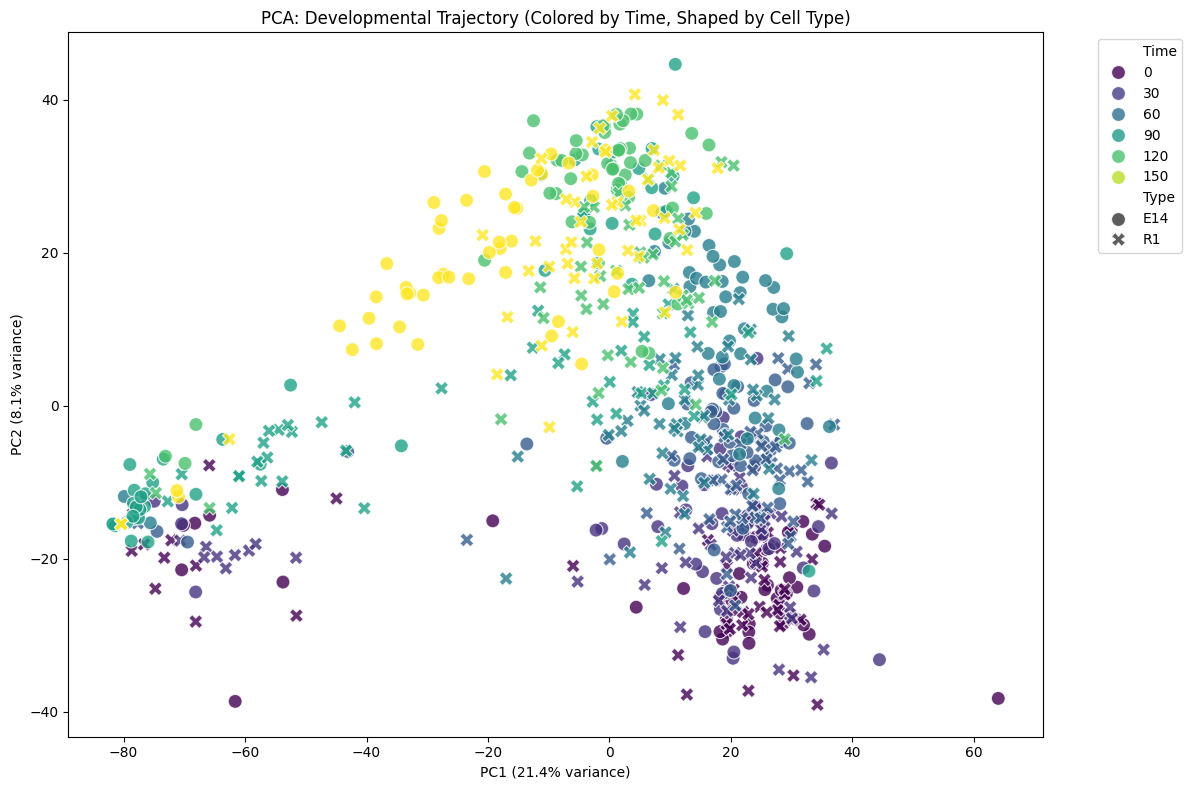

'\n- Reduces 96-gene expression data into two principal components for 2D visualization.\n- Maps high-dimensional cellular "decisions" onto a state-space trajectory.\n- Reveals divergence between E14 and R1 cell types over the 168-hour timeline.\n '

In [5]:
########## Part 4. Write your code in this cell ############
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare Data
# Drop non-gene columns to isolate gene expression values
X = df.drop(['Sample', 'Time', 'Type', 'Unnamed: 99'], axis=1, errors='ignore')

# 2. Perform PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2b. Importance of components
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.2%}")

# Create a temporary dataframe for plotting
pca_df = df[['Time', 'Type']].copy()
pca_df['PC1'] = X_pca[:, 0]
pca_df['PC2'] = X_pca[:, 1]

# 3. Basic Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('PCA: PC1 vs PC2')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.show()

# 4. Enhanced Scatter Plot (Time as Color, Type as Marker)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df, 
    x='PC1', 
    y='PC2', 
    hue='Time', 
    style='Type', 
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('PCA: Developmental Trajectory (Colored by Time, Shaped by Cell Type)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
"""
- Reduces 96-gene expression data into two principal components for 2D visualization.
- Maps high-dimensional cellular "decisions" onto a state-space trajectory.
- Reveals divergence between E14 and R1 cell types over the 168-hour timeline.
 """

### Part 5. Dimensionality Reduction (Non-linear methods)
Non-linear dimensionality reduction (t-SNE, UMAP) methods usually produce better visualisations than PCA

1. Redo steps 1,3,4 of the previous part (keeping only 2 components, then 3 components) using a non-linear reduction method of your choice (**t-SNE** or **UMAP**). What do you observe ? How is the visulisation produced compared to the visual result of PCA ?


Bonus: Redo step 1 using the dimensionality reduction method **isomap** (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html)

Running t-SNE with 2 components...


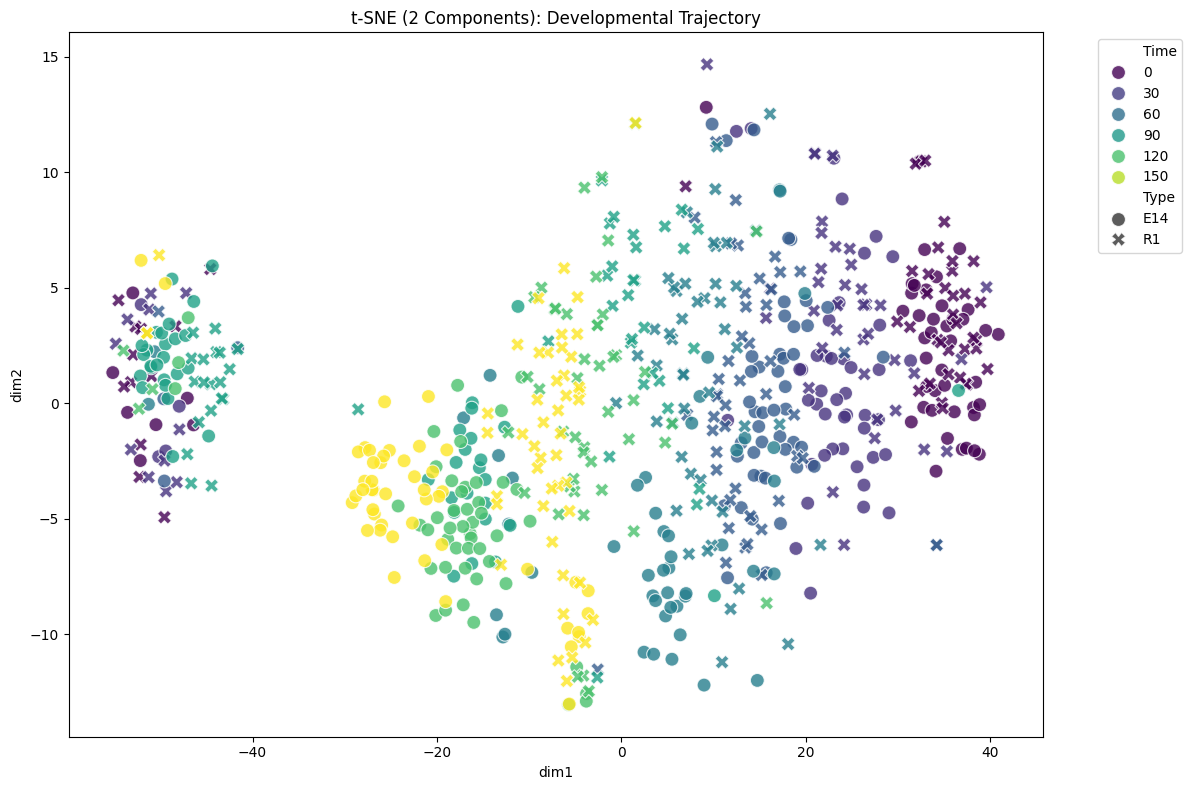

Running t-SNE with 3 components...


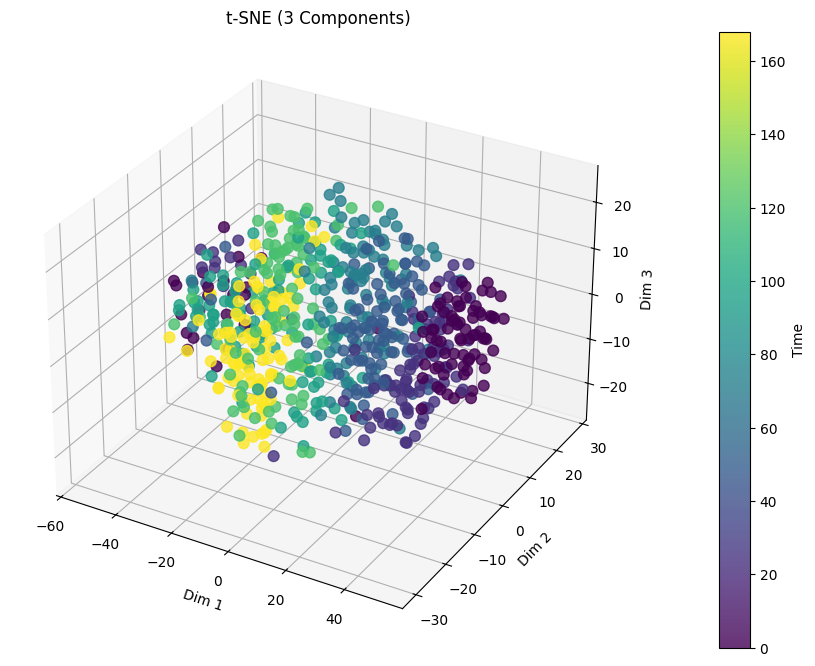

Running Isomap (Bonus)...


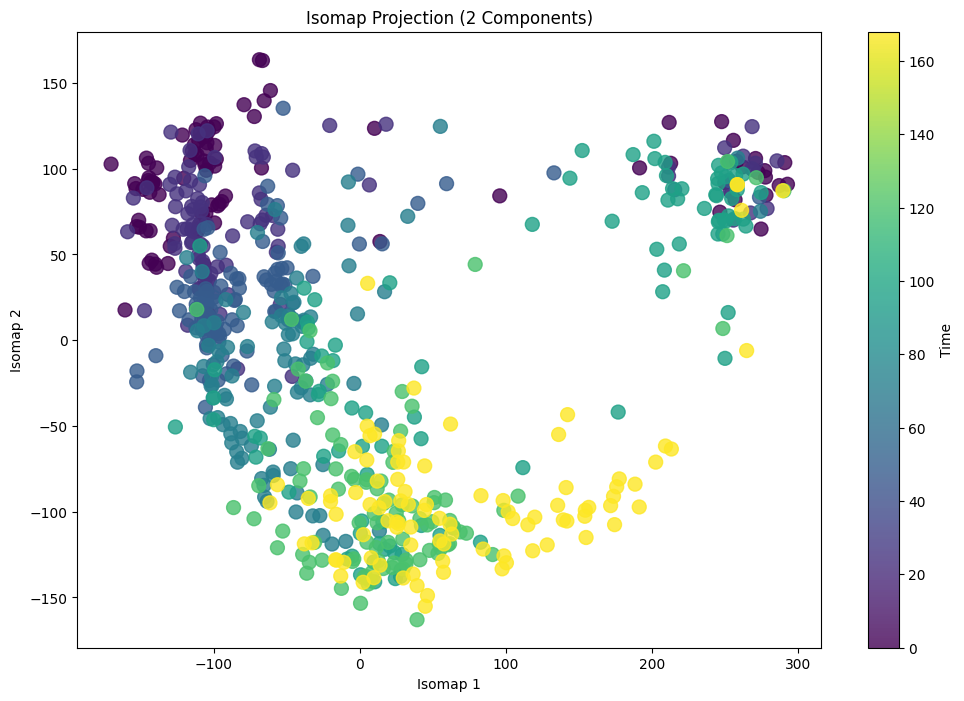

'\nObservations:\n- t-SNE creates distinct clusters or strands for the time points.\n- Compared to PCA, the separation between developmental stages might be more pronounced, but the global distance interpretation is lost (clusters might be arbitrarily far apart).\n- The \'trajectory\' is less linear than PCA but may better reveal local manifolds of gene expression states.\n- Isomap (Bonus) attempts to preserve geodesic distances, often resulting in a trajectory that looks like a "bent" version of PCA, emphasizing the underlying connectivity of the states.\n'

In [6]:
########## Part 5. Write your code in this cell ############
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 1. Prepare Data
X = df.drop(['Sample', 'Time', 'Type', 'Unnamed: 99'], axis=1, errors='ignore')

# --- 2 Components ---
print("Running t-SNE with 2 components...")
tsne_2d = TSNE(n_components=2, perplexity=30, random_state=42, init='pca', learning_rate='auto')
X_tsne_2d = tsne_2d.fit_transform(X)

tsne_df_2d = df[['Time', 'Type']].copy()
tsne_df_2d['dim1'] = X_tsne_2d[:, 0]
tsne_df_2d['dim2'] = X_tsne_2d[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=tsne_df_2d, 
    x='dim1', 
    y='dim2', 
    hue='Time', 
    style='Type', 
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('t-SNE (2 Components): Developmental Trajectory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 3 Components ---
print("Running t-SNE with 3 components...")
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42, init='pca', learning_rate='auto')
X_tsne_3d = tsne_3d.fit_transform(X)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_tsne_3d[:, 0],
    X_tsne_3d[:, 1],
    X_tsne_3d[:, 2],
    c=df['Time'],
    cmap='viridis',
    s=60,
    alpha=0.8
)
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Time')
ax.set_title('t-SNE (3 Components)')
ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')
ax.set_zlabel('Dim 3')
plt.show()

# --- Bonus: Isomap ---
from sklearn.manifold import Isomap
print("Running Isomap (Bonus)...")
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=df['Time'], cmap='viridis', s=100, alpha=0.8)
plt.colorbar(label='Time')
plt.title('Isomap Projection (2 Components)')
plt.xlabel('Isomap 1')
plt.ylabel('Isomap 2')
plt.show()

"""
Observations:
- t-SNE creates distinct clusters or strands for the time points.
- Compared to PCA, the separation between developmental stages might be more pronounced, but the global distance interpretation is lost (clusters might be arbitrarily far apart).
- The 'trajectory' is less linear than PCA but may better reveal local manifolds of gene expression states.
- Isomap (Bonus) attempts to preserve geodesic distances, often resulting in a trajectory that looks like a "bent" version of PCA, emphasizing the underlying connectivity of the states.
"""